- **ipylernel** -> It provides a IPython kernel for Jupyter notebook.
- **python-dotenv** -> It reads key-value pairs from a .env file and can set then as an environment variables.
- **pypdf** -> need to install when using PyPDFLoader

Reference: https://python.langchain.com/docs/tutorials/rag/
### Retrieval Augmented Generation (RAG)
RAG is a technique for augmenting LLM knowledge with additional data. The process of bringing and inserting appropriate information into the model prompt is known as RAG. We can use this with both **unstructured and structured** data like SQL data.

A typical RAG application has two main components:
- **Indexing:** a pipeline for ingesting data from a source and indexing it. This usually happens offline.
    - **Load** means Data Ingestion
    - **Split** means Data Transformation-dividing into chunks
    - **Store** means VectorStore DB- embed and then store

    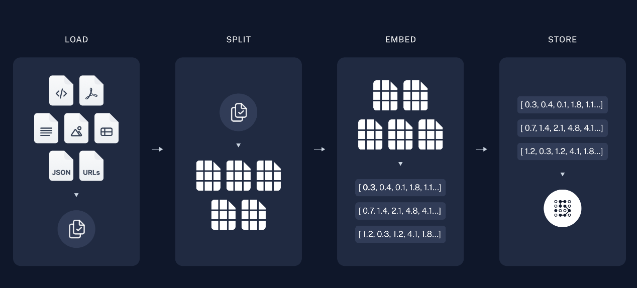
- **Retrieval and Generation:** the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.
    - **Retrieve** means Retrieval chain, which is an inteface responsible for querying vector store db and get context info
    - **Generate** means pass the prompt and context info to get the final response

    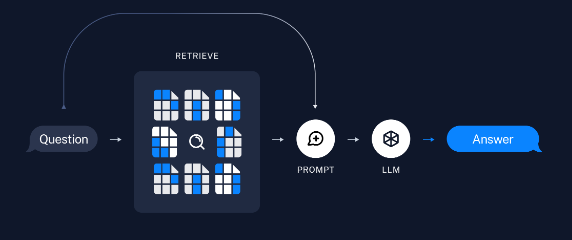

Reference: https://python.langchain.com/docs/integrations/document_loaders/

### Data Ingestion - DocumentLoaders
DocumentLoaders load data into the standard LangChain Document format. Each DocumentLoader has its **own specific parameters**, but they can all be invoked in the same way with the **.load()** method.
- **TextLoader:** to load any **.txt** files
- **PyPDFLoader:** to load any **.pdf** files
- **WebBaseLoader:** to load any **HTML web page** using url path
- **ArxivLoader:** to load any **research paper completely** using that paper code
- **WikipediaLoader:** to load any **wikipedia content completely** based on any topic

In [3]:
# TextLoader - loading a speech.txt file
from langchain_community.document_loaders import TextLoader

# providing the filepath in the loader
loader=TextLoader('files/speech.txt')

# invoking the loader by calling .load() method
txt_doc=loader.load()
txt_doc

[Document(metadata={'source': 'files/speech.txt'}, page_content='Generative artificial intelligence (generative AI, GenAI, or GAI) is a subset of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. These models often generate output in response to specific prompts. Generative AI systems learn the underlying patterns and structures of their training data, enabling them to create new data.\n\nImprovements in transformer-based deep neural networks, particularly large language models (LLMs), enabled an AI boom of generative AI systems in the early 2020s. These include chatbots such as ChatGPT, Copilot, Gemini and LLaMA, text-to-image artificial intelligence image generation systems such as Stable Diffusion, Midjourney and DALL-E, and text-to-video AI generators such as Sora.Companies such as OpenAI, Anthropic, Microsoft, Google, and Baidu as well as numerous smaller firms have developed generative AI models.')]

In [18]:
# PyPDFLoader - loading a summary.pdf file
from langchain_community.document_loaders import PyPDFLoader

# providing the filepath in the loader
loader=PyPDFLoader('files/summary.pdf')

# invoking the loader by calling .load() method
pdf_doc=loader.load()
print(pdf_doc)

# If we're loading a large number of Documents, we can lazily load our Documents one at a time to minimize our memory footprint
docs = []
for doc in loader.lazy_load():
    docs.append(doc)

    if len(docs) >= 10:
        # do some paged operation, e.g.
        # index.upsert(doc)
        docs = []
len(docs)

[Document(metadata={'source': 'files/summary.pdf', 'page': 0}, page_content='1 | P a g e  \n \nPrinted Pages: Sub Code:  \nPaper Id:                                         Roll No.           \n \nNAME OF PROGRAM  \n(SEM ….) THEORY EXAMINATION 2019-20 \nSUBJECT NAME \nTime: 3 Hours        Total Marks: 100 \nNote:  1. Attempt all Sections. If require any missing data; then choose suitably. \n \nSECTION A \n1. Attempt all questions in brief.      2 x 10 = 20 \nQ no. Question Marks CO \na.  Explain two different usages of def in Python with examples. \n \n2 4 \nb.  Write a recursive Python program to print numbers from N to 1 (N >= \n1) in a single line, separated by space. \n \n2 5 \nc.  Describe the behavior of “ while” construct in Python with an \nExample. \n \n2 2 \nd.  Explain the difference between “break” and “continue” constructs \nin Python. \n \n2 2 \ne.  Write Python statement to create tuple containing a single eleme nt \n1054. \n \n2 1 \nf.  When evaluating a complicated exp

3

In [ ]:
# WebBaseLoader - loading a html web page 
from langchain_community.document_loaders import WebBaseLoader
import bs4

# this will load the entire url content
loader=WebBaseLoader('https://en.wikipedia.org/wiki/Generative_artificial_intelligence')
web_doc=loader.load()
print(web_doc)

# if we want to load only specific content like on the basis of classes used in html page
loaderSpecific=WebBaseLoader('https://en.wikipedia.org/wiki/Generative_artificial_intelligence', 
                             bs_kwargs=dict(parse_only=bs4.SoupStrainer(
                                 class_=("mw-page-title-main","vector-body-before-content")
                             )))
specific_class_loader=loaderSpecific.load()
specific_class_loader

[Document(metadata={'source': 'https://en.wikipedia.org/wiki/Generative_artificial_intelligence', 'title': 'Generative artificial intelligence - Wikipedia', 'language': 'en'}, page_content='\n\n\n\nGenerative artificial intelligence - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAppearance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDonate\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\nDonate Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n

[Document(metadata={'source': 'https://en.wikipedia.org/wiki/Generative_artificial_intelligence'}, page_content='Generative artificial intelligence\n\n\nFrom Wikipedia, the free encyclopedia\n')]

In [ ]:
# ArxivLoader - to load complete research paper using paper code
from langchain_community.document_loaders import ArxivLoader

loader=ArxivLoader(
    query='2411.09391',
    load_max_docs=2,
    # doc_content_chars_max=1000,
    # load_all_available_meta=False,
    )
arxiv_doc=loader.load()
arxiv_doc

arxiv_summary=loader.get_summaries_as_docs()
arxiv_summary

[Document(metadata={'Entry ID': 'http://arxiv.org/abs/2411.09391v1', 'Published': datetime.date(2024, 11, 14), 'Title': 'An Optimizing Just-In-Time Compiler for Rotor', 'Authors': 'João H. Trindade, José C. Silva'}, page_content='The Shared Source CLI (SSCLI), also known as Rotor, is an implementation of\nthe CLI released by Microsoft in source code. Rotor includes a single pass\njust-in-time compiler that generates non-optimized code for Intel IA-32 and IBM\nPowerPC processors. We extend Rotor with an optimizing just-in-time compiler\nfor IA-32. This compiler has three passes: control flow graph generation, data\ndependence graph generation and final code generation. Dominance relations in\nthe control flow graph are used to detect natural loops. A number of\noptimizations are performed during the generation of the data dependence graph.\nDuring native code generation, the rich address modes of IA-32 are used for\ninstruction folding, reducing code size and usage of register names. De

In [15]:
# WikipediaLoader - just provide any topic which you want to search on wikipedia 
from langchain_community.document_loaders import WikipediaLoader

loader=WikipediaLoader(
    query='gen ai',
    load_max_docs=2,
    lang='en',
    load_all_available_meta=False,
    doc_content_chars_max=100,
    )
wiki_doc=loader.load()
wiki_doc

[Document(metadata={'title': 'Generative artificial intelligence', 'summary': 'Generative artificial intelligence (generative AI, GenAI, or GAI) is a subset of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. These models often generate output in response to specific prompts. Generative AI systems learn the underlying patterns and structures of their training data, enabling them to create new data. \nImprovements in transformer-based deep neural networks, particularly large language models (LLMs), enabled an AI boom of generative AI systems in the early 2020s. These include chatbots such as ChatGPT, Copilot, Gemini and LLaMA, text-to-image artificial intelligence image generation systems such as Stable Diffusion, Midjourney and DALL-E, and text-to-video AI generators such as Sora. Companies such as OpenAI, Anthropic, Microsoft, Google, and Baidu as well as numerous smaller firms have developed generative AI models.\nGenerative

Reference: https://python.langchain.com/docs/concepts/text_splitters/

### Data Transformation - langchain_text_splitters

It involves breaking down large texts into smaller, manageable chunks. This process offers several benefits, such as ensuring consistent processing of varying document lengths, overcoming input size limitations of models, and improvind the quality of text representations used in retrieval systems. There are several strategies for splitting documents, each with its own advantages.

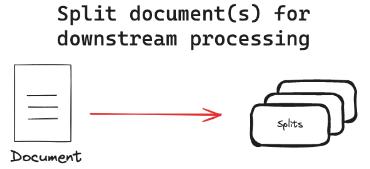

**Different Approches for text splitting**
- **CharacterTextSplitter:** Length-based: each chunk doesn't exceed a specified size limit
    - **Token-based:** split text based on the number of tokens
    - **Character-based:** split text based on the number of characters
- **RecursiveCharacterTextSplitter:** attempts to keep larger units(e.g., paragraph) intact. If a unit exceeds the chunk size.it moves to next level(e.g., sentences). This process continue down to the word level if necessary.

NOTE: At last we want that the splitted chunks to be document format so there are some methods:
- **.split_text():** if the type of chunks is doc already then use this method to simply split it
- **.create_documents():** if the type of chunks is not odc then use this method as it will split the text and then convert it in document format

